## Подготовка данных

In [15]:
import pickle
import numpy as np
with open("../results/dnn/ecoli_10_10000_1000.data", "rb") as file:
    data_list = pickle.load(file)
data = data_list[0]

# LSTM

In [ ]:
from rnn_models import *

Using TensorFlow backend.


In [ ]:
model, history = run_rnn_model_1(data)

Train on 9000 samples, validate on 1000 samples
Epoch 1/100
8512/9000 [===========================>..] - ETA: 0s - loss: 1.3818 - acc: 0.2843

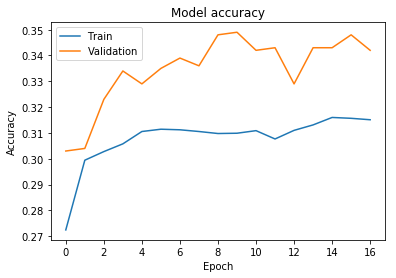

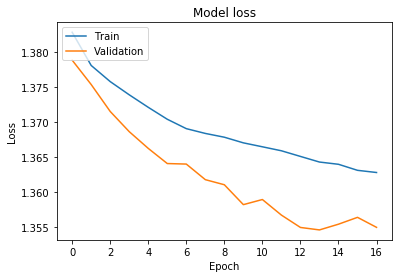

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [89]:
model.evaluate(data.test1, data.test_ans)

1000/1000 [==============================] - 1s 641us/step


[1.3603198890686035, 0.316]

In [90]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 10)                600       
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 44        
Total params: 644
Trainable params: 644
Non-trainable params: 0
_________________________________________________________________


In [1]:
with open("../results/rnn/rnn_model_1_all_runs_10_p3.pyob", "rb") as file:
    (test_accs_1, train_accs_1) = pickle.load(file)  
print(len(test_accs_1))

FileNotFoundError: [Errno 2] No such file or directory: '../results/rnn/rnn_model_1_all_runs_10_p3.pyob'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot([test_accs_1, train_accs_1])
plt.xticks([1,2], ('test', 'train'))
plt.ylabel("accuracy")
plt.show()

In [ ]:
import scipy.stats
# scipy.stats.wilcoxon(test_accs_1, train_accs_1)
scipy.stats.mannwhitneyu(test_accs_1, train_accs_1)

Попробуем загрузить модель

In [16]:
from keras.models import model_from_json
json_file = open('../results/rnn/2019-04-22-00-12/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("../results/rnn/2019-04-22-00-12/0.weights")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
loaded_model.evaluate(data.test1, data.test_ans)

Loaded model from disk
1000/1000 [==============================] - 2s 2ms/step


[1.3836664791107178, 0.28599999999999998]

In [18]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
Total params: 644
Trainable params: 644
Non-trainable params: 0
_________________________________________________________________


In [19]:
with open("../results/rnn/2019-04-22-00-12/rnn_model_1_all_runs_10_p3.pyob", "rb") as file:
    (test_accs, train_accs) = pickle.load(file)  
print(len(test_accs))

1


In [20]:
test_accs

[0.28599999999999998]